In [1]:
pwd

'/Users/apple/.Trash/PERSONAL/companies/Adidas'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train=pd.read_excel('/Users/apple/Downloads/train_file.xlsx')
test=pd.read_excel('/Users/apple/Downloads/test_file.xlsx')

In [4]:
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,0,nonexistent,no


In [5]:
train.describe()

,age,duration,campaign,previous
count,32910.000000,32910.000000,32910.000000,32910.000000
mean,40.014099,258.164327,2.560620,0.174810
std,10.402948,259.070260,2.753336,0.499211
min,17.000000,0.000000,1.000000,0.000000
25%,32.000000,103.000000,1.000000,0.000000
50%,38.000000,180.000000,2.000000,0.000000
75%,47.000000,319.000000,3.000000,0.000000
max,98.000000,4918.000000,56.000000,7.000000


In [8]:

def basic_eda( merged_df):
    plot_df=pd.DataFrame()
    for c in merged_df.columns:
        row= pd.DataFrame({'column':[c], 'dtype':[merged_df[c].dtype],'unique_values': [len(merged_df[c].unique())],
            'null_values':[merged_df[c].isnull().sum(), ]})
        # print(row)
        plot_df=pd.concat([plot_df,row], ignore_index=True)
    return(plot_df)


In [10]:
eda_data=basic_eda(train)
eda_data.style.background_gradient()

,column,dtype,unique_values,null_values
0,age,int64,75,0
1,job,object,12,0
2,marital,object,4,0
3,education,object,8,0
4,default,object,3,0
5,housing,object,3,0
6,loan,object,3,0
7,contact,object,2,0
8,month,object,10,0
9,day_of_week,object,5,0


In [37]:
12*4*8*3*3*3*2*18*5*3

5598720

In [12]:
train.describe()

,age,duration,campaign,previous
count,32910.000000,32910.000000,32910.000000,32910.000000
mean,40.014099,258.164327,2.560620,0.174810
std,10.402948,259.070260,2.753336,0.499211
min,17.000000,0.000000,1.000000,0.000000
25%,32.000000,103.000000,1.000000,0.000000
50%,38.000000,180.000000,2.000000,0.000000
75%,47.000000,319.000000,3.000000,0.000000
max,98.000000,4918.000000,56.000000,7.000000


### cardinality in data= 12*4*8....*3= 5598720
observation - bayesian, embedding layer would require cause of high cardinality

In [70]:
eda_data=basic_eda(test)
eda_data.style.background_gradient()

,column,dtype,unique_values,null_values
0,age,int64,23,0
1,job,object,10,0
2,marital,object,3,0
3,education,object,6,0
4,default,object,2,0
5,housing,object,3,0
6,loan,object,3,0
7,contact,object,2,0
8,month,object,6,0
9,day_of_week,object,5,0


In [13]:
train.day_of_week.unique()

array(['wed', 'mon', 'tue', 'fri', 'thu'], dtype=object)

In [14]:
# Convert target variable into numeric to see corelation analysis
data=train
data.y = data.y.map({'no':0, 'yes':1}).astype('uint8')
# Build correlation matrix
corr = data.corr()
corr.style.background_gradient(cmap='PuBu')

,age,duration,campaign,previous,y
age,1.000000,-0.001741,0.003406,0.020794,0.028860
duration,-0.001741,1.000000,-0.075651,0.022585,0.400887
campaign,0.003406,-0.075651,1.000000,-0.078974,-0.065425
previous,0.020794,0.022585,-0.078974,1.000000,0.229876
y,0.028860,0.400887,-0.065425,0.229876,1.000000


In [11]:
# analysing both the categories seperately
train_no=train[train['y'] == 'no']
train_yes=train[train['y'] == 'yes']

In [12]:
print(len(train_no), len(train_yes))

29203 3707


### observation 2- may require over-sampling

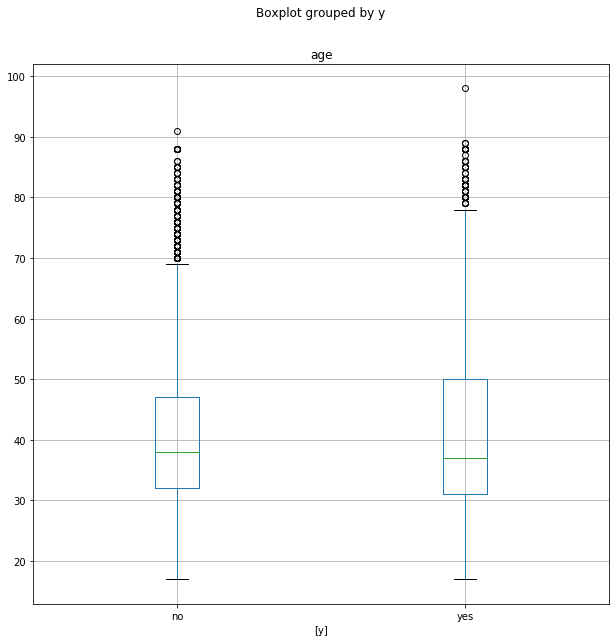

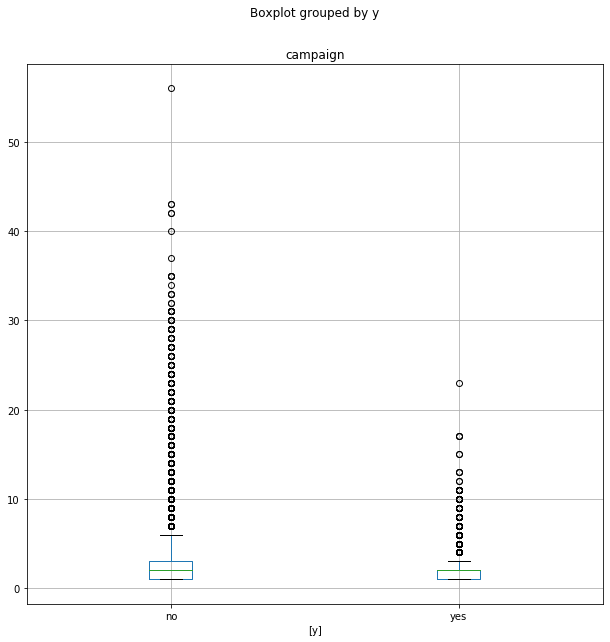

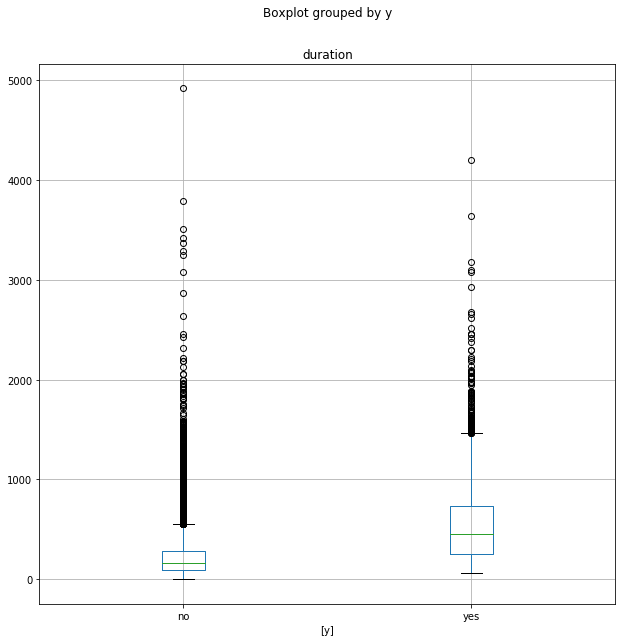

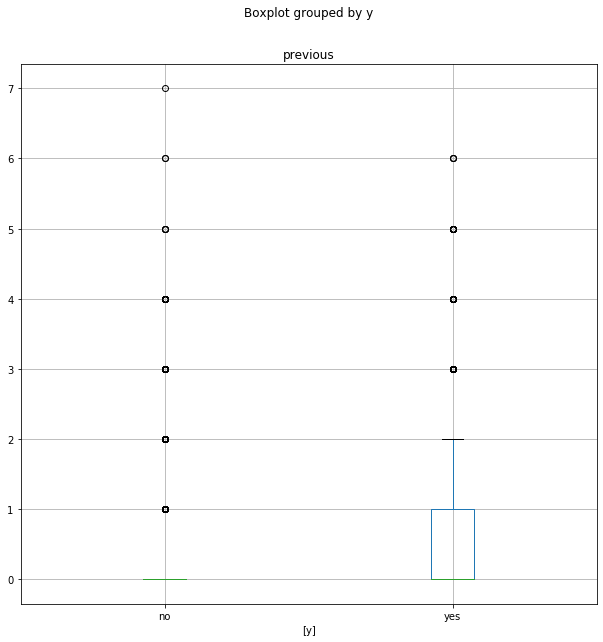

In [8]:
for c in ['age','campaign','duration','previous']:
    train[[c,'y']].boxplot(by='y', figsize= (10,10))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


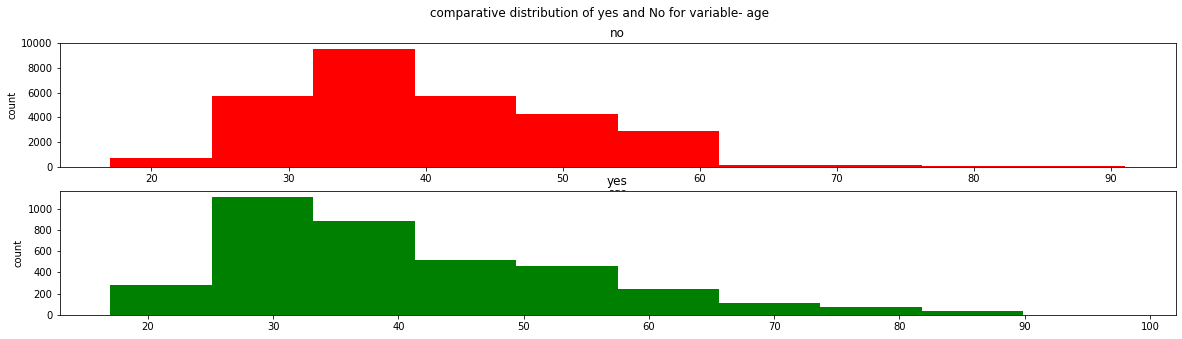

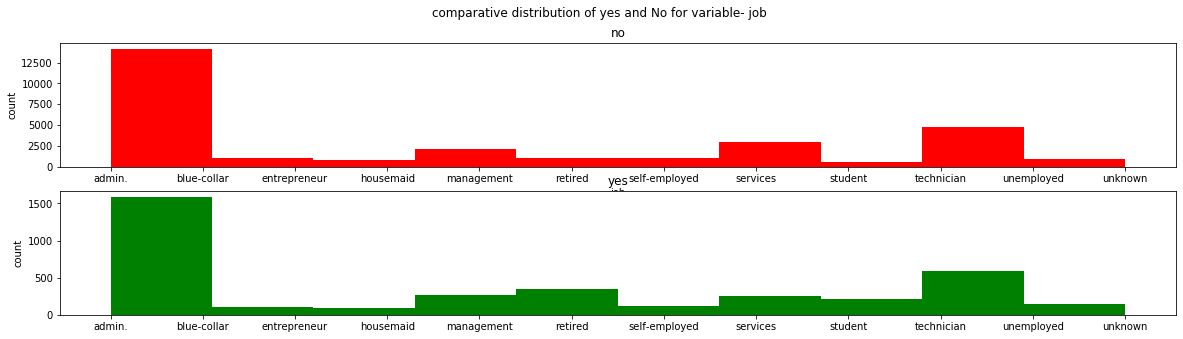

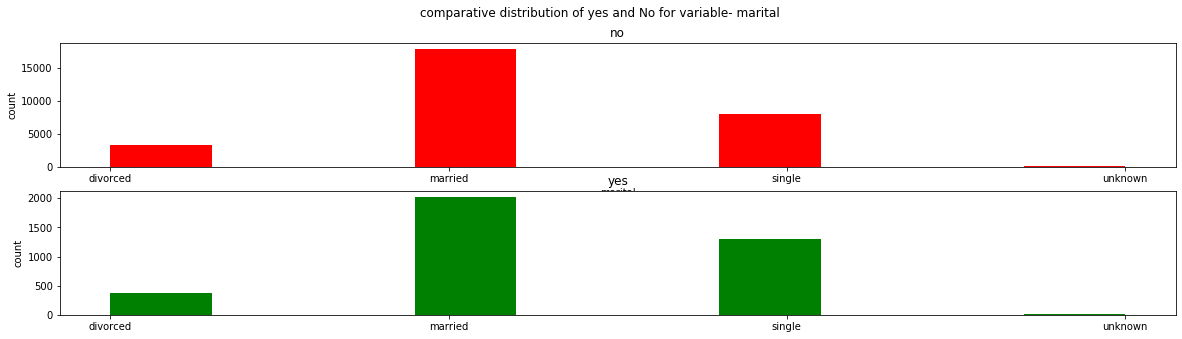

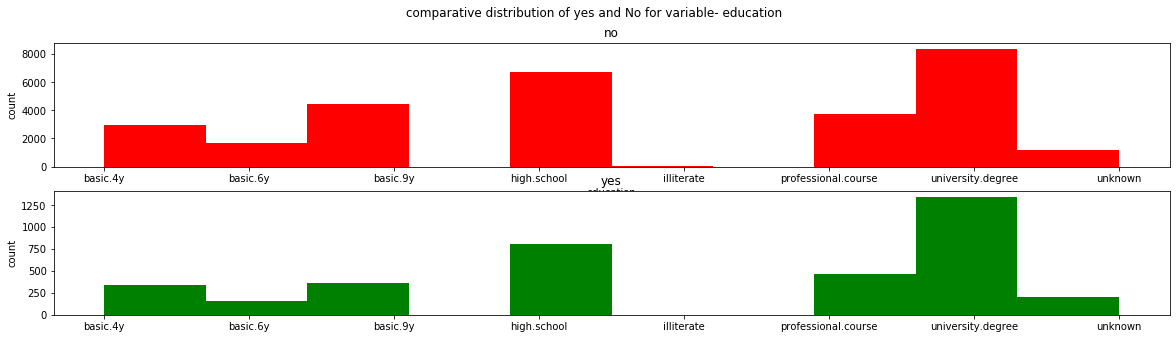

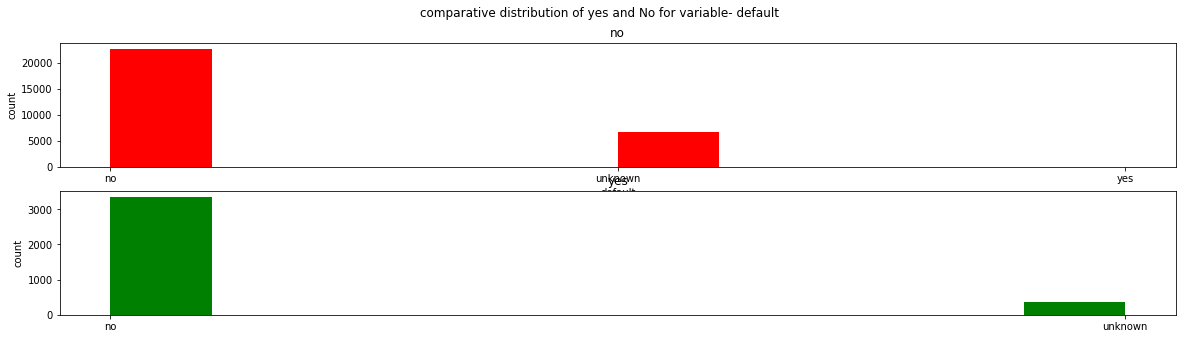

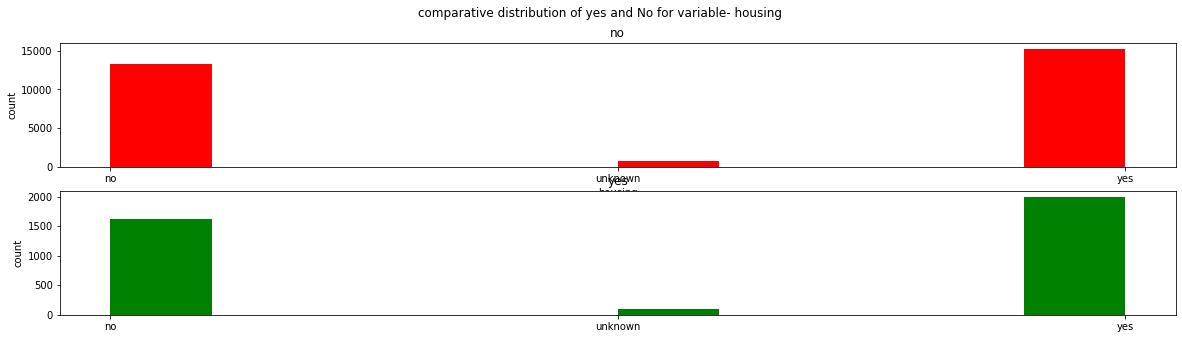

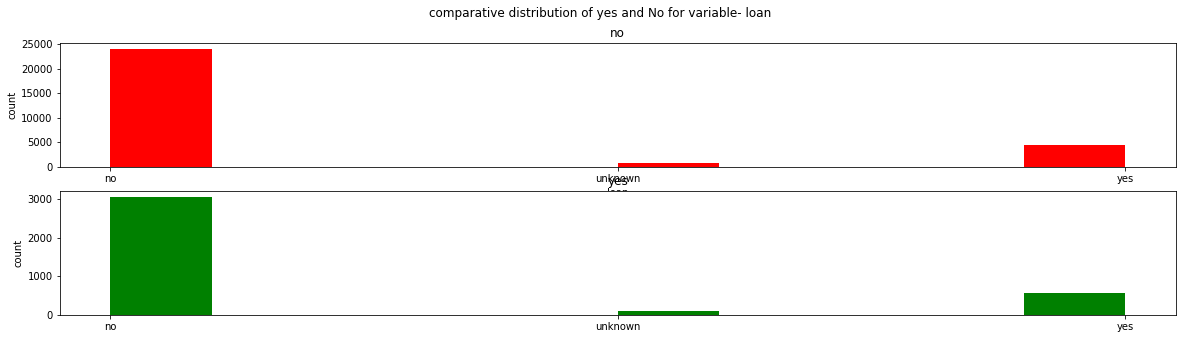

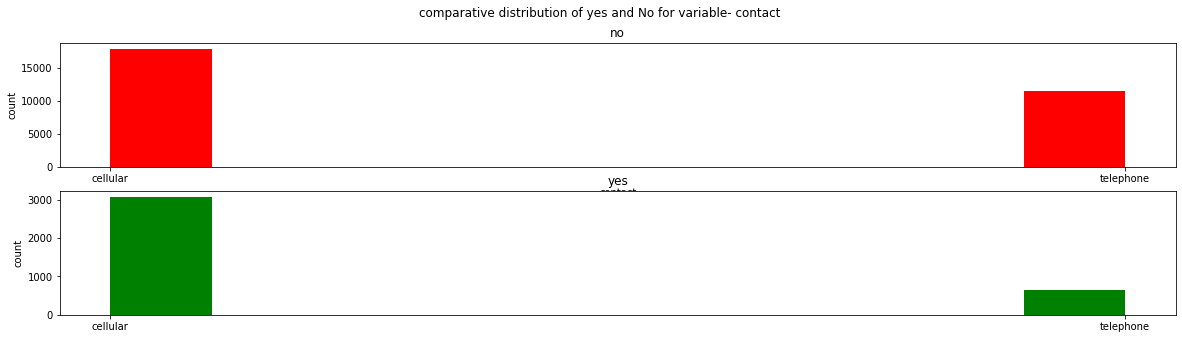

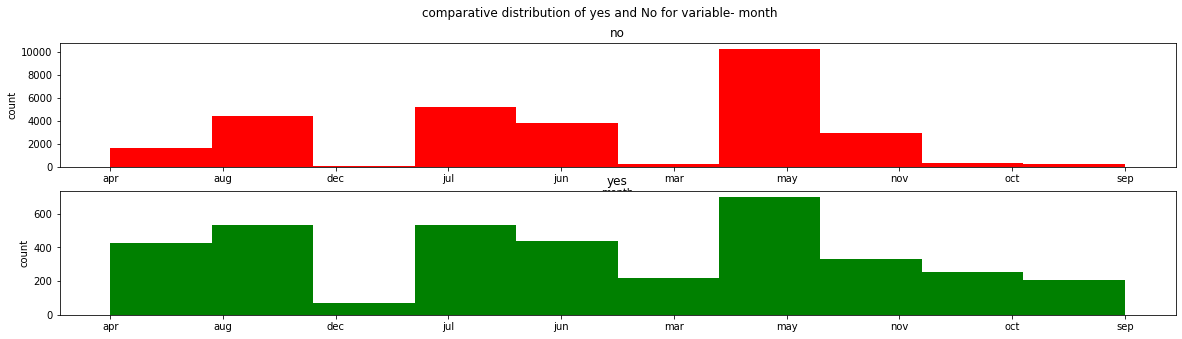

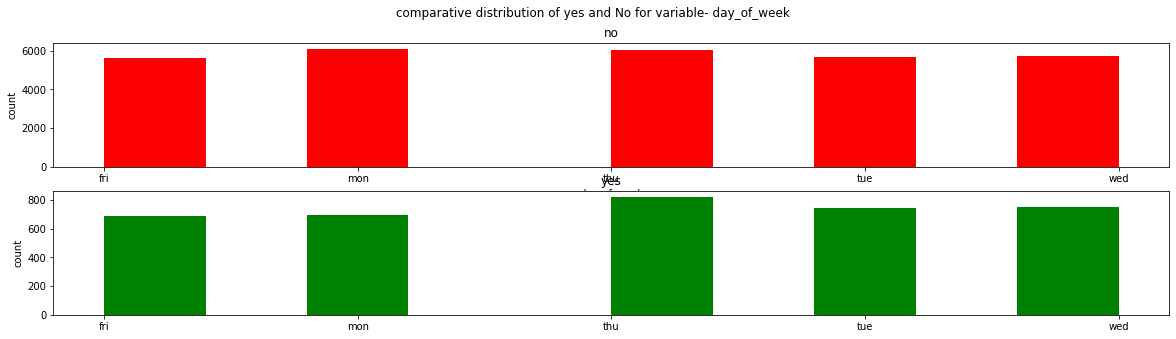

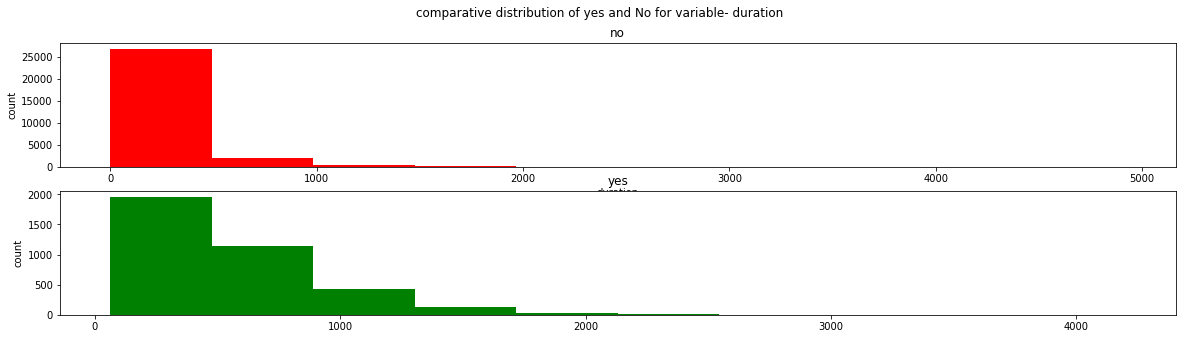

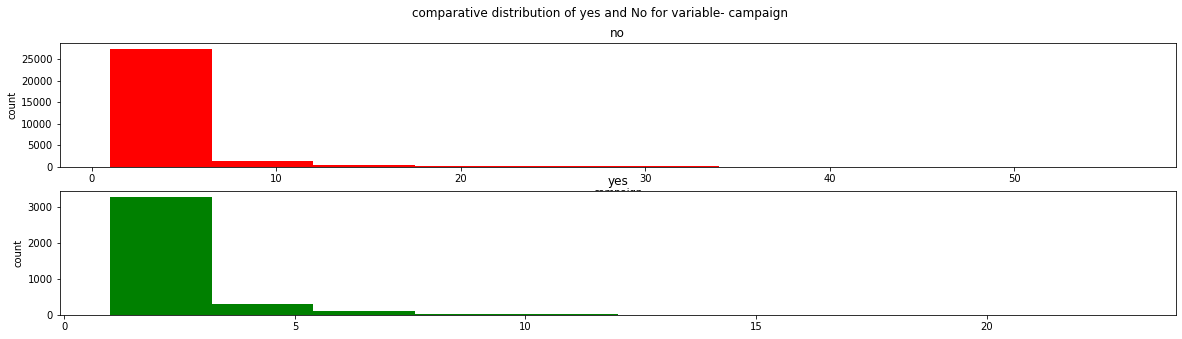

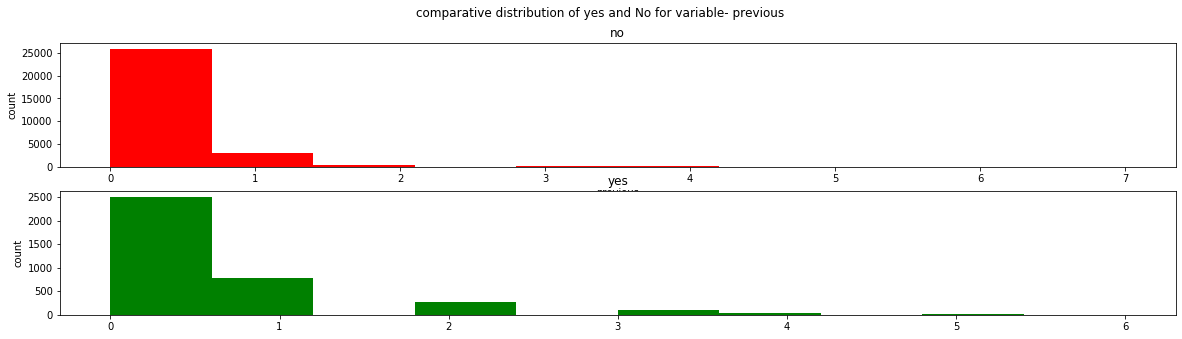

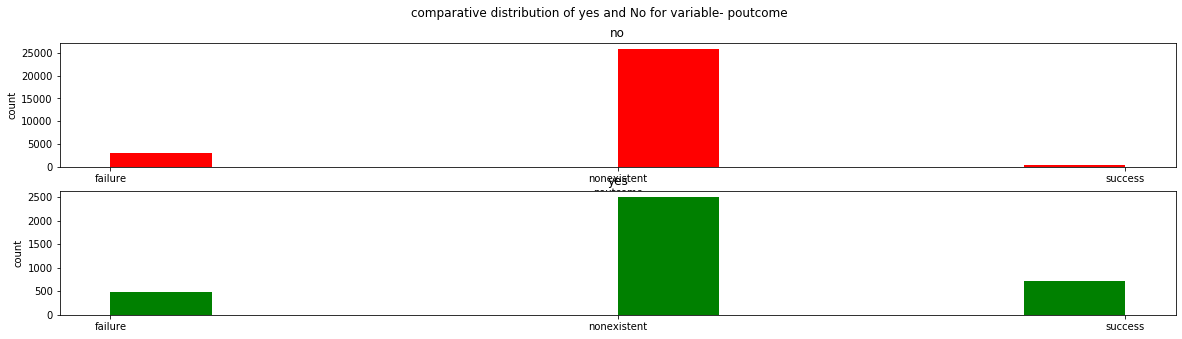

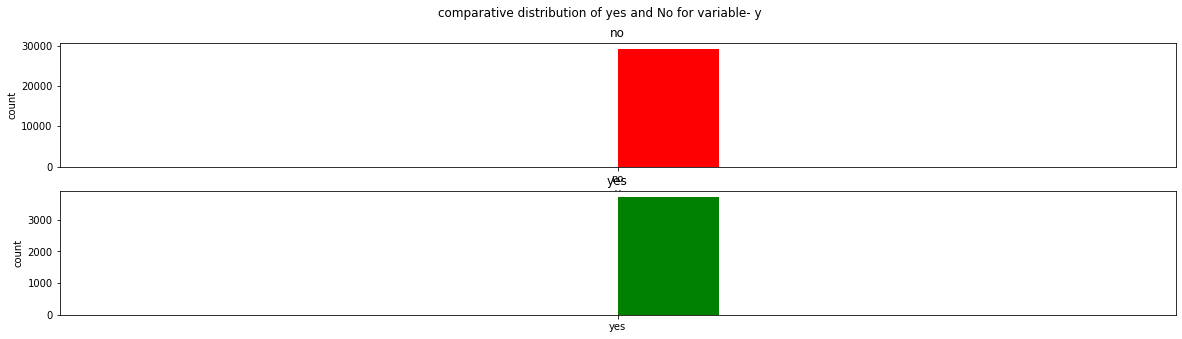

In [36]:
for c in train.columns:
    
    plt.figure(figsize=(20,5))
    plt.suptitle('comparative distribution of yes and No for variable- '+ c)
    plt.subplot(2, 1, 1)
    plt.title('no')
    plt.xlabel(c)
    plt.ylabel('count')
    train_no.sort_values(by=[c], inplace=True)
    train_yes.sort_values(by=[c], inplace=True)
    plt.hist(train_no[c], color='red')
    plt.subplot(2, 1, 2)
    plt.title('yes')
    plt.ylabel('count')
    plt.hist(train_yes[c], color='green')

### observation 3-  Age and duration has less unique values, can be binned for experiment

## building Basic classification models

In [17]:
train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,0,nonexistent,0
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,1,failure,0
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,0,nonexistent,1
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,0,nonexistent,0
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,0,nonexistent,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32905,30,management,single,university.degree,no,no,no,cellular,nov,thu,197,5,1,failure,0
32906,34,blue-collar,married,high.school,no,yes,no,telephone,jun,mon,562,3,0,nonexistent,0
32907,33,technician,married,professional.course,no,yes,yes,cellular,aug,mon,61,1,0,nonexistent,0
32908,58,unemployed,married,basic.9y,no,no,no,telephone,jun,mon,266,2,0,nonexistent,0


In [18]:
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'previous',
       'poutcome', 'y'],
      dtype='object')

##  doing one hot encoding.
frequency encodig, target encoding,label encoding can also be done

In [22]:
# creating one hot incoding
cat_col= ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'previous',
       'poutcome']
list_df=[train]
for c in cat_col:
    df_name= 'dummy_'+c
    df_name=pd.get_dummies(train[c], prefix='dummy',drop_first=True)
    list_df.append(df_name)
train_dummy = pd.concat(list_df,axis=1)

train_dummy.drop(cat_col,axis=1, inplace=True)


In [29]:
train_dummy.head()

,age,duration,campaign,y,dummy_blue-collar,dummy_entrepreneur,dummy_housemaid,dummy_management,dummy_retired,dummy_self-employed,...,dummy_wed,dummy_1,dummy_2,dummy_3,dummy_4,dummy_5,dummy_6,dummy_7,dummy_nonexistent,dummy_success
0,49,227,4,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,37,202,2,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,78,1148,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,36,120,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,59,368,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [28]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

In [30]:
scaled_df= scaler.fit_transform(train_dummy[['age','duration','campaign']])

In [ ]:
# convert numpy array to dataframe
scaled_df=pd.DataFrame(scaled_df, columns=['age','duration','campaign'])

In [38]:
# removing non scaled values and adding scaled values
scaled_df_train=pd.concat([scaled_df, train_dummy.iloc[:,3:]], axis=1)

In [39]:
print(scaled_df_train.shape, train_dummy.shape)


(32910, 54) (32910, 54)


In [40]:
#from sklearn.model_selection import train_test_split
#X_train, X_test= train_test_split(scaled_df_train, test_size=0.2)

In [43]:
y=scaled_df_train.y
X=scaled_df_train.drop(['y'], axis=1)
X

,age,duration,campaign,dummy_blue-collar,dummy_entrepreneur,dummy_housemaid,dummy_management,dummy_retired,dummy_self-employed,dummy_services,...,dummy_wed,dummy_1,dummy_2,dummy_3,dummy_4,dummy_5,dummy_6,dummy_7,dummy_nonexistent,dummy_success
0,0.863797,-0.120295,0.522785,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,-0.289739,-0.216795,-0.203618,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,3.651511,3.434779,-0.566819,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,-0.385868,-0.533316,-0.203618,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1.825078,0.423967,-0.203618,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32905,-0.962636,-0.236095,0.885986,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
32906,-0.578124,1.172810,0.159583,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
32907,-0.674252,-0.761057,-0.566819,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
32908,1.728950,0.030246,-0.203618,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## multiple algos can be tried simultaneously
https://scikit-learn.org/0.19/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
#creating the objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
nb_cv=BernoulliNB()
rfc_cv=RandomForestClassifier()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes',5:'RandomForestClassifier'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv,rfc_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))
    
    
    
    
    
    

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Logistic Regression Test Accuracy: 0.9057429352780311
Decision Tree Test Accuracy: 0.8744150714068673
KNN Test Accuracy: 0.894287450622911
SVC Test Accuracy: 0.9059556365846249
Naive Bayes Test Accuracy: 0.8856578547553935
RandomForestClassifier Test Accuracy: 0.9055302339714372


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33,random_state=1)
param_grid = {'C': np.logspace(-4, 4, 50), # c- inverse of regularization strength, lambda
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan 0.8873872         nan 0.8874779         nan 0.88797677
        nan 0.88811286        nan 0.88901996        nan 0.88920135
        nan 0.89006309        nan 0.89092479        nan 0.89192254
        nan 0.89373668        nan 0.89500655        nan 0.89695677
        nan 0.897501          nan 0.89990464        nan 0.90067566
        nan 0.90153744        nan 0.90258057        nan 0.9029434
        nan 0.90326087        nan 0.90357833        nan 0.90403187
        nan 0.904304          nan 0.90448541        nan 0.90462148
        nan 0.90439472        nan 0.90430402        nan 0.90434938
        nan 0.90430403        nan 0.90412262        nan 0.90416797
        nan 0.90416797        nan 0.90425868        nan 0.90421333
        nan 0.90407727        nan 0.90416797        nan 0.90416796
        nan 0.90421333        nan 0.90425868        na

LogisticRegression(C=0.5689866029018293, random_state=0)
The mean accuracy of the model is: 0.9070987938495535


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [139]:
type(grid)

dict

## understanding error pattern

In [50]:
prediction_log=best_model.predict(X_test)

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction_log))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      9632
           1       0.67      0.35      0.46      1229

    accuracy                           0.91     10861
   macro avg       0.80      0.66      0.70     10861
weighted avg       0.89      0.91      0.89     10861



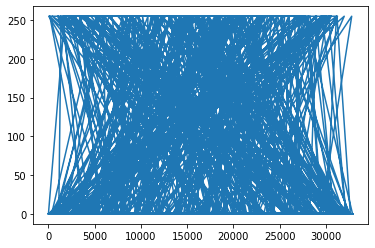

In [54]:
error_list= y_test-prediction_log
plt.plot(error_list)

(array([10651.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   210.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

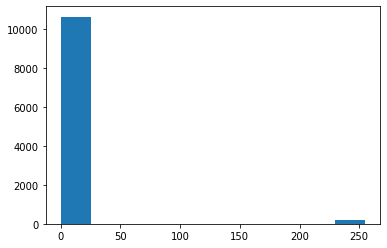

In [59]:
plt.hist(error_list)

(array([10221.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   640.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

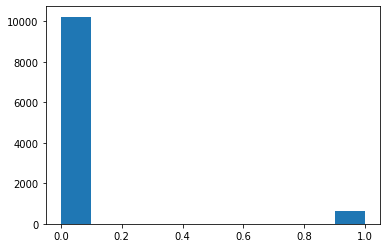

In [61]:
plt.hist(prediction_log)

In [65]:
list_pred= list(prediction_log)

In [66]:
list_y_test=list(y_test)

In [67]:
error_list=list_y_test-list_pred

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [70]:
error_df=pd.DataFrame({'y':list_y_test,'pred':list_pred})

In [71]:
error_df['error']=error_df['y']- error_df['pred']

In [72]:
error_df.tail()

,y,pred,error
10856,0,0,0
10857,0,0,0
10858,0,0,0
10859,0,0,0
10860,0,0,0


(array([ 210.,    0.,    0.,    0.,    0., 9852.,    0.,    0.,    0.,
         799.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

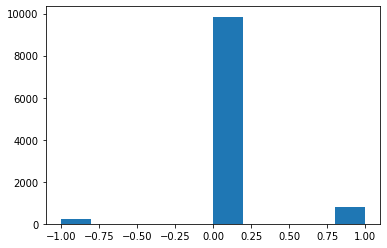

In [73]:
plt.hist(error_df.error)

In [75]:
X_test['error']=error_df.error

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [76]:
X_test.columns

Index(['age', 'duration', 'campaign', 'dummy_blue-collar',
       'dummy_entrepreneur', 'dummy_housemaid', 'dummy_management',
       'dummy_retired', 'dummy_self-employed', 'dummy_services',
       'dummy_student', 'dummy_technician', 'dummy_unemployed',
       'dummy_unknown', 'dummy_married', 'dummy_single', 'dummy_unknown',
       'dummy_basic.6y', 'dummy_basic.9y', 'dummy_high.school',
       'dummy_illiterate', 'dummy_professional.course',
       'dummy_university.degree', 'dummy_unknown', 'dummy_unknown',
       'dummy_yes', 'dummy_unknown', 'dummy_yes', 'dummy_unknown', 'dummy_yes',
       'dummy_telephone', 'dummy_aug', 'dummy_dec', 'dummy_jul', 'dummy_jun',
       'dummy_mar', 'dummy_may', 'dummy_nov', 'dummy_oct', 'dummy_sep',
       'dummy_mon', 'dummy_thu', 'dummy_tue', 'dummy_wed', 'dummy_1',
       'dummy_2', 'dummy_3', 'dummy_4', 'dummy_5', 'dummy_6', 'dummy_7',
       'dummy_nonexistent', 'dummy_success', 'error'],
      dtype='object')

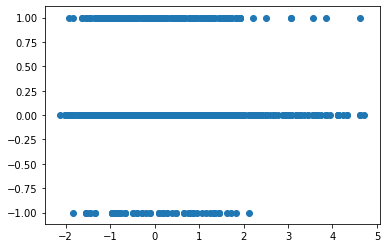

In [77]:
plt.scatter(X_test.age, X_test.error)

In [78]:
inverse_transform= scaler.inverse_transform(X_test[['age', 'duration', 'campaign']])

In [82]:
new_df= pd.DataFrame(inverse_transform, columns=['Age','Duration','Campaign'])

In [85]:
test_error_analysis= pd.concat([new_df, X_test], axis= 1)

In [86]:
test_error_analysis

,Age,Duration,Campaign,age,duration,campaign,dummy_blue-collar,dummy_entrepreneur,dummy_housemaid,dummy_management,...,dummy_1,dummy_2,dummy_3,dummy_4,dummy_5,dummy_6,dummy_7,dummy_nonexistent,dummy_success,error
0,37.0,287.0,2.0,0.863797,-0.120295,0.522785,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,41.0,290.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,34.0,238.0,1.0,3.651511,3.434779,-0.566819,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,43.0,131.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,34.0,87.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32890,NaN,NaN,NaN,-1.347148,-0.205215,0.159583,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
32893,NaN,NaN,NaN,-1.251020,-0.205215,-0.203618,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
32899,NaN,NaN,NaN,-0.097483,-0.293995,-0.566819,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
32901,NaN,NaN,NaN,-0.962636,-0.394356,-0.566819,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
